# siriuspy.ramp subpackage

This notebook provides examples on how to use siriuspy.ramp subpackage in order to manipulate booster ramps and storage ring migration power supply waveforms. 

In [4]:
from lnls import notebook
notebook.turn_code_on_off_html()

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from siriuspy.ramp.magnet import Magnet
from siriuspy.ramp.waveform import Waveform
from siriuspy.ramp.magnet_waveform import MagnetWaveform

# Modules

These are the modules of the subpackage:

* __magnet.py__: _Magnet_ class implementing the abstraction of magnets. Methods in theses classes are responsible to convert magnet integrated strengths to corresponding power supply currents, for example.
* __waveform.py__: _Waveform_ class implementing manipulation of waveforms.
* __magnet_waveform.py__: _MagnetWaveform_ Class implementing a magnet for which a waveform is defined. This waveform is accessed in both current and strength units.
* __conn.py__: module with connector objects to interact with soft IOCs and ConfigDB service.

# Magnet Class

Let us first create a Magnet object corresponding to the booster dipole and print its main properties:

In [2]:
magnet = Magnet(maname='BO-Fam:MA-B')

print(magnet)


maname         : BO-Fam:MA-B
section        : BO
dipole_name    : None
family_name    : None
magfunc        : dipole
strength_label : Energy
strength_units : GeV
current_min    : 0.0
current_max    : 990.0


These objects have methos that allows for converting current and strength values back and forth:

In [3]:
strength = 3.0 # [GeV]
current = magnet.conv_strength_2_current(strengths=strength)
energy = magnet.conv_current_2_strength(currents=current)
strfmt = 'strength = {} GeV -> current = {} A -> energy = {} GeV'
print(strfmt.format(strength,current,energy))

strength = 3.0 GeV -> current = 981.7835215242155 A -> energy = 3.0000000000000004 GeV


# Waveform Class

There is one base _Waveform_ class that implements all methods to create, modify and retrives waveforms.

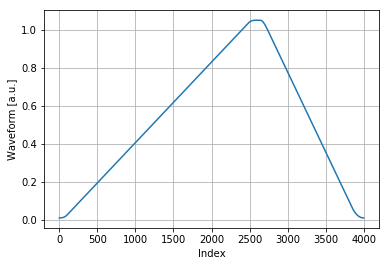

value at maximum         : 1.05000000
value at injection point : 0.05000000 (idx = 160)
value at ejection point  : 1.00000000 (idx = 2400)


In [4]:
# With no arguments the constructor creates a default waveform:

w = Waveform()

%matplotlib inline
plt.plot(w)
plt.xlabel('Index'); plt.ylabel('Waveform [a.u.]')
plt.grid('on')
plt.show()

# By default the value 1.0 should correspond to the beam ejection point, 
# whereas the value 1.0/20 (20 = E_eje/E_inj) should correspond to the injection point:

idx_inj = 160
idx_eje = 2400
print('value at maximum         : {:.8f}'.format(max(w)))
print('value at injection point : {:.8f} (idx = {})'.format(w[idx_inj],idx_inj))
print('value at ejection point  : {:.8f} (idx = {})'.format(w[idx_eje],idx_eje))

_Waveform_ objects are composed of one parameterized waveform and one curve bumps on top of the parameterized one.

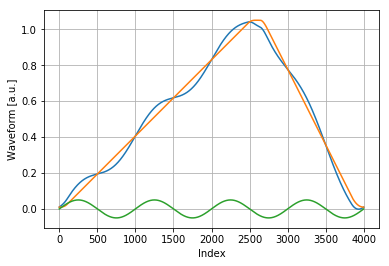

In [5]:
w = Waveform()

w.waveform_bumps = 0.05*np.sin(2*np.pi*np.array(range(len(w)))/1000)
wt = w.waveform
wp = w.waveform_parms
wb = w.waveform_bumps

%matplotlib inline
plt.plot(wt) # plot total waveform [BLUE]
plt.plot(wp) # plot parameterized component [ORANGE]
plt.plot(wb) # plot bump component [GREEN]
plt.xlabel('Index'); plt.ylabel('Waveform [a.u.]')
plt.grid('on')
plt.show()

## Waveform Parametrization

The parametrized component of the waveform is composed of 9 disctinct regions. There are therefore 8 indices that define the boundary limits of each region. The first and last regions, for the default waveform, have 1-point widths. In each regian the default waveform is a polynominal curve of varying order, with continous current and first derivative.

Regions boundary limits: [1, 104, 2480, 2576, 2640, 2736, 3840, 3999]

Region 0 (linear), 0  <= i < i0, i0 = 1
Region 1 (cubic) , i0 <= i < i1, i1 = 104
Region 2 (linear), i1 <= i < i2, i2 = 2480 (ramp up)
Region 3 (cubic),  i2 <= i < i3, i3 = 2576
Region 4 (linear), i3 <= i < i4, i4 = 2640 (plateau)
Region 5 (cubic),  i4 <= i < i5, i5 = 2736
Region 6 (linear), i5 <= i < i6, i6 = 3840 (ramp down)
Region 7 (cubic),  i6 <= i < i7, i7 = 3999
Region 8 (linear), i7 <= i < 4000


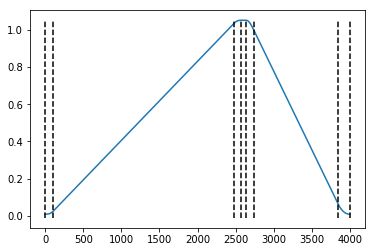

In [6]:
w = Waveform()
print('Regions boundary limits: {}'.format(w.i07))
print('')
print('Region 0 (linear), 0  <= i < i0, i0 = {}'.format(w.i0))
print('Region 1 (cubic) , i0 <= i < i1, i1 = {}'.format(w.i1))
print('Region 2 (linear), i1 <= i < i2, i2 = {} (ramp up)'.format(w.i2))
print('Region 3 (cubic),  i2 <= i < i3, i3 = {}'.format(w.i3))
print('Region 4 (linear), i3 <= i < i4, i4 = {} (plateau)'.format(w.i4))
print('Region 5 (cubic),  i4 <= i < i5, i5 = {}'.format(w.i5))
print('Region 6 (linear), i5 <= i < i6, i6 = {} (ramp down)'.format(w.i6))
print('Region 7 (cubic),  i6 <= i < i7, i7 = {}'.format(w.i7))
print('Region 8 (linear), i7 <= i < {}'.format(len(w)))

w_min, w_max = min(w), max(w)
%matplotlib inline
plt.plot(w)
plt.plot([w.i0,w.i0],[-w_min,w_max], 'k--')
plt.plot([w.i1,w.i1],[-w_min,w_max], 'k--')
plt.plot([w.i2,w.i2],[-w_min,w_max], 'k--')
plt.plot([w.i3,w.i3],[-w_min,w_max], 'k--')
plt.plot([w.i4,w.i4],[-w_min,w_max], 'k--')
plt.plot([w.i5,w.i5],[-w_min,w_max], 'k--')
plt.plot([w.i6,w.i6],[-w_min,w_max], 'k--')
plt.plot([w.i7,w.i7],[-w_min,w_max], 'k--')
plt.show()

In the plot above limit lines for Region0-Region1 and Region7-Region8 are not discernable since the first and the last regions are only 1 point wide.

Waveform values at these 8 limit indices and at the waveform extremities can also be accessed using class interface methods. Method _vL0_ impose the same value at the waveform start and at _i0_. Likewise, _v34_ impose the same value at _i3_ and at _i4_ (plateau):

In [7]:
print('Value at i=0 and at i=i0 is given by property "vL0"  : {:4f}'.format(w.vL0))
print('Value at i=i1 is given by property "v1"              : {:.4f}'.format(w.v1))
print('Value at i=i2 is given by property "v2"              : {:.4f}'.format(w.v2))
print('Value at i=i3 and at i=i4 is given by property "v34" : {:.4f}'.format(w.v34))
print('Value at i=i5 is given by property "v5"              : {:.4f}'.format(w.v5))

Value at i=0 and at i=i0 is given by property "vL0"  : 0.010000
Value at i=i1 is given by property "v1"              : 0.0263
Value at i=i2 is given by property "v2"              : 1.0339
Value at i=i3 and at i=i4 is given by property "v34" : 1.0500
Value at i=i5 is given by property "v5"              : 1.0000


## Changing RampUp, Plateau and RampDown

There are utility methods that allow changing both linear ramp up and ramp down without waveform 'overshoots' and guaranteeing continuities. For that, _i0_ and _i3_ are reset for ramp up changes, as collateral effect. Likewise, _i4_ and _i7_ are reset for ramp down changes:

3455


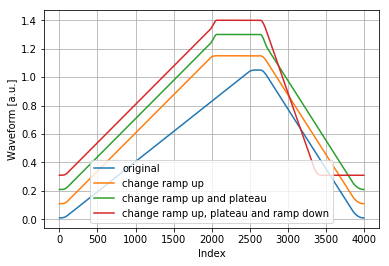

In [19]:
w = Waveform()
w0 = [0*0.1 + v for v in w.waveform]

w.change_ramp_up(start=w.i1, stop=w.i2-500, start_value=w.v1, stop_value=w.v2)
w1 = [1*0.1 + v for v in w.waveform]

w.change_plateau(value=1.1)
w2 = [2*0.1 + v for v in w.waveform]

w.change_ramp_down(stop=w.i6-500)
w3 = [3*0.1 + v for v in w.waveform]
print(w.i7)


%matplotlib inline
plt.plot(w0, label='original')
plt.plot(w1, label='change ramp up')
plt.plot(w2, label='change ramp up and plateau')
plt.plot(w3, label='change ramp up, plateau and ramp down')
plt.legend()
plt.xlabel('Index'); plt.ylabel('Waveform [a.u.]')
plt.grid('on')
plt.show()

# MagnetWaveform Class

The functionalities of _Magnet_ and _Waveform_ are combined in _MagnetWaveform_. This class also introduces convertion from current to strength units:

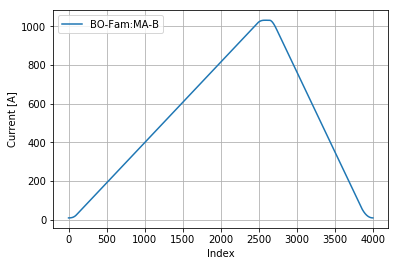

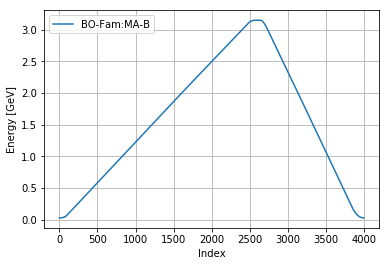

In [14]:
# create Booster dipole waveform
b = MagnetWaveform(maname='BO-Fam:MA-B')

# plot dipole Current waveform
plt.plot(b.waveform, label=b.maname)
plt.legend()
plt.xlabel('Index'); plt.ylabel('Current [A]')
plt.grid('on')
plt.show()

# plot dipole Strength waveform 
plt.plot(b.strengths, label=b.maname)
plt.legend()
plt.xlabel('Index'); plt.ylabel('Energy [GeV]')
plt.grid('on')
plt.show()

Quadrupoles and sextupoles magnets need informations from dipole waveform to perform current and strength conversions. Likewise, trims need quadrupoles waveform informations:

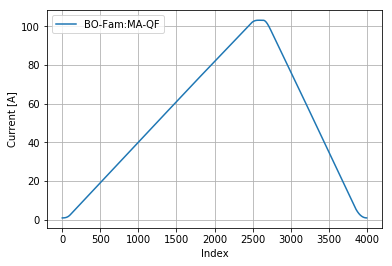

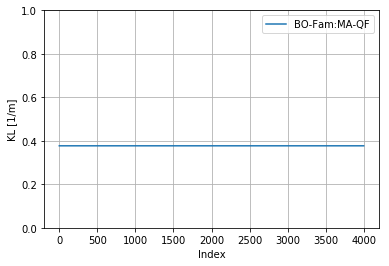

In [15]:
# create Booster QF waveform
qf = MagnetWaveform(maname='BO-Fam:MA-QF', dipole=b)

# plot QF Current waveform
plt.plot(qf.waveform, label=qf.maname)
plt.legend()
plt.xlabel('Index'); plt.ylabel('Current [A]')
plt.grid('on')
plt.show()

# plot QF Strength waveform 
plt.plot(qf.strengths, label=qf.maname)
plt.ylim(0,1.0)
plt.legend()
plt.xlabel('Index'); plt.ylabel('KL [1/m]')
plt.grid('on')
plt.show()

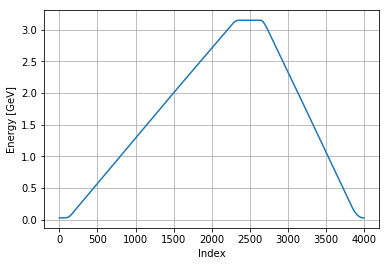

In [16]:
# now change ramp up of dipole affect waveform of QF ...

b = MagnetWaveform(maname='BO-Fam:MA-B')
b.change_ramp_up(start=b.i1+50, stop=b.i2-200, start_value=b.v1, stop_value=b.v2)
plt.plot(b.strengths)
plt.xlabel('Index'); plt.ylabel('Energy [GeV]')
plt.grid('on')
plt.show()


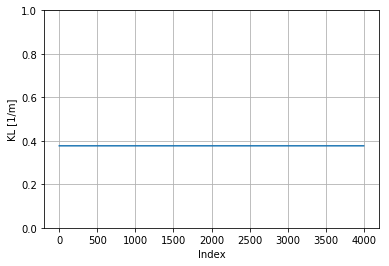

In [17]:

qf = MagnetWaveform(maname='BO-Fam:MA-QF', dipole=b)
plt.plot(qf.strengths)
plt.ylim(0,1.0)
plt.xlabel('Index'); plt.ylabel('KL [1/m]')
plt.grid('on')
plt.show()
